In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\Recap-Data Analysis\Python\cleaning and exploration\Explore\adult_census_income_openml.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target,capital-gain_log1p,capital-loss_log1p
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0.000000,0.0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0.000000,0.0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,0.000000,0.0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,8.947546,0.0
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K,0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,0.000000,0.0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,0.000000,0.0
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,0.000000,0.0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,0.000000,0.0


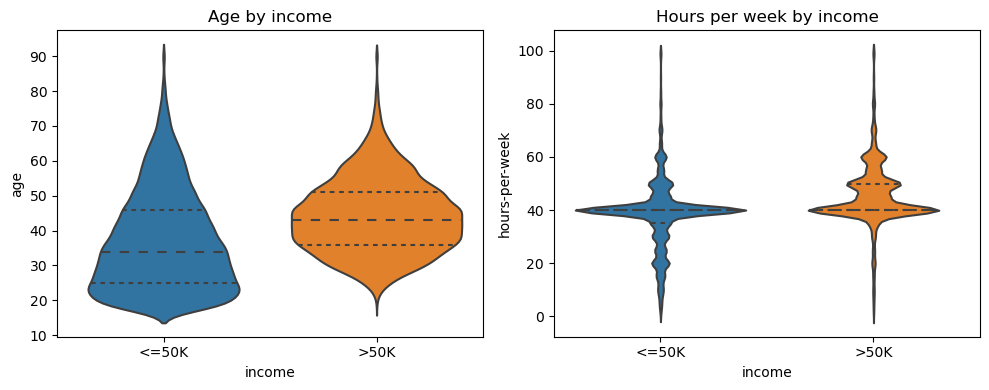

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.violinplot(x="income",y="age",data=df, order = ['<=50K','>50K'], inner ='quartile')
plt.title('Age by income')
plt.subplot(1,2,2)
sns.violinplot(x="income",y="hours-per-week",data=df, order = ['<=50K','>50K'], inner ='quartile')
plt.title('Hours per week by income')
plt.tight_layout()
plt.show()

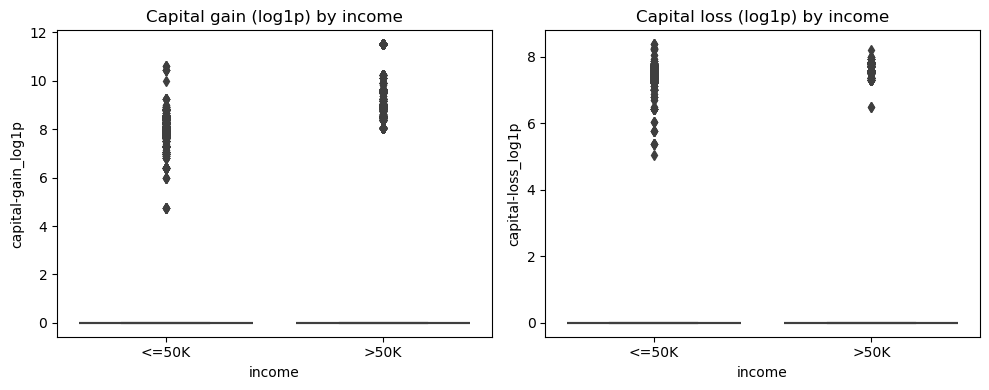

In [8]:
for c in ['capital-gain','capital-loss']:
    df[c + '_log1p'] = np.log1p(df[c])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='income', y='capital-gain_log1p', data=df, order=['<=50K','>50K'])
plt.title('Capital gain (log1p) by income')
plt.subplot(1,2,2)
sns.boxplot(x='income', y='capital-loss_log1p', data=df, order=['<=50K','>50K'])
plt.title('Capital loss (log1p) by income')
plt.tight_layout()
plt.show()


income           <=50K      >50K
education                       
10th          0.937365  0.062635
11th          0.949227  0.050773
Assoc-acdm    0.742036  0.257964
Assoc-voc     0.746725  0.253275
Bachelors     0.587165  0.412835
HS-grad       0.841422  0.158578
Masters       0.450884  0.549116
Some-college  0.810351  0.189649
income                <=50K      >50K
occupation                           
Adm-clerical       0.863126  0.136874
Craft-repair       0.773724  0.226276
Exec-managerial    0.522182  0.477818
Machine-op-inspct  0.876903  0.123097
Other-service      0.958562  0.041438
Prof-specialty     0.548931  0.451069
Sales              0.732013  0.267987
Transport-moving   0.795754  0.204246


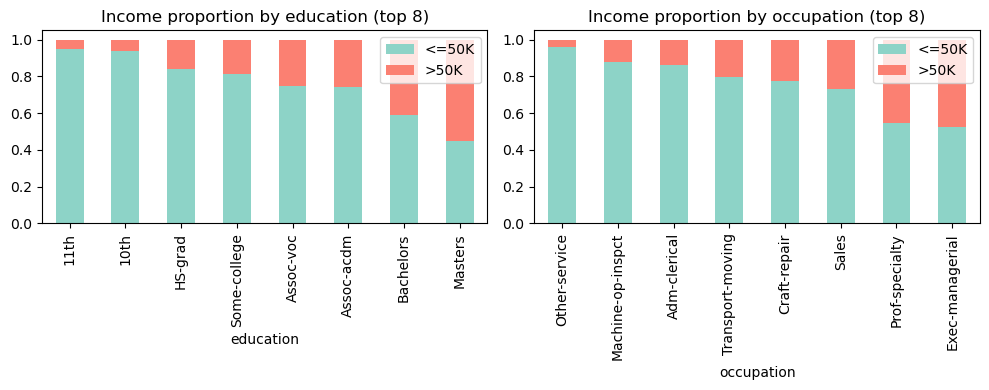

In [9]:
def stacked_prop(df_in, cat_col, target_col, top_n=8):
    top_vals = df_in[cat_col].value_counts().head(top_n).index
    tmp = df_in[df_in[cat_col].isin(top_vals)]
    ct = pd.crosstab(tmp[cat_col], tmp[target_col], normalize='index')
    return ct

edu_prop = stacked_prop(df, 'education', 'income', top_n=8)
occ_prop = stacked_prop(df, 'occupation', 'income', top_n=8)

print(edu_prop)
print(occ_prop)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
edu_prop[['<=50K','>50K']].sort_values('>50K').plot(kind='bar', stacked=True, color=['#8dd3c7','#fb8072'], ax=plt.gca())
plt.title('Income proportion by education (top 8)')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
occ_prop[['<=50K','>50K']].sort_values('>50K').plot(kind='bar', stacked=True, color=['#8dd3c7','#fb8072'], ax=plt.gca())
plt.title('Income proportion by occupation (top 8)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076628       0.030940      0.077229      0.056944   
fnlwgt         -0.076628  1.000000      -0.038761     -0.003706     -0.004366   
education-num   0.030940 -0.038761       1.000000      0.125146      0.080972   
capital-gain    0.077229 -0.003706       0.125146      1.000000     -0.031441   
capital-loss    0.056944 -0.004366       0.080972     -0.031441      1.000000   
hours-per-week  0.071558 -0.013519       0.143689      0.082157      0.054467   
target          0.230369 -0.006339       0.332613      0.223013      0.147554   

                hours-per-week    target  
age                   0.071558  0.230369  
fnlwgt               -0.013519 -0.006339  
education-num         0.143689  0.332613  
capital-gain          0.082157  0.223013  
capital-loss          0.054467  0.147554  
hours-per-week        1.000000  0.227687  
target                0.227687  1.000000  


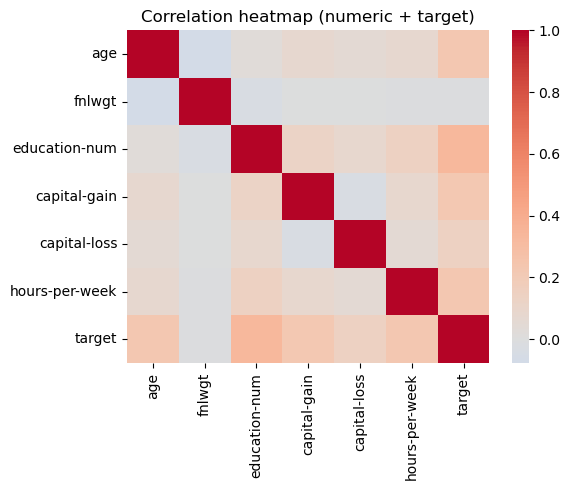

In [10]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','target']
corr = df[num_cols].corr()
print(corr) 
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation heatmap (numeric + target)')
plt.tight_layout()
plt.show()